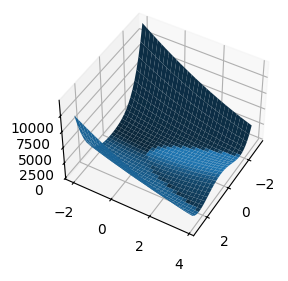

[1. 1. 1. 1. 1.]
[0.939 0.882 0.776 0.603 0.361]


In [4]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

import matplotlib.pyplot as plt
graph = plt.figure(figsize=[5, 3])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = least_squares(func_rosen, x1)
print(np.round(result_point.x,3))

In [15]:
import numpy as np
f = np.array([8, 2, 8, 3, 5, 6, 5, 15], dtype=float)
 
np.gradient(f)
print(np.gradient(f))
# array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])
np.gradient(f, 7)
print(np.gradient(f,7))
# array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))

[-6.   0.   0.5 -1.5  1.5  0.   4.5 10. ]
[-0.85714286  0.          0.07142857 -0.21428571  0.21428571  0.
  0.64285714  1.42857143]
0.0
0.25
-0.75
0.75
0.0
2.25


# Градиентный спуск

[array([1.73133366, 2.38454427])]
[[1.73133366 2.38454427]
 [1.38506693 1.90763542]
 [1.10805354 1.52610833]
 [0.88644283 1.22088667]
 [0.70915427 0.97670933]
 [0.56732341 0.78136747]
 [0.45385873 0.62509397]
 [0.36308698 0.50007518]
 [0.29046959 0.40006014]
 [0.23237567 0.32004811]
 [0.18590054 0.25603849]
 [0.14872043 0.20483079]
 [0.11897634 0.16386463]
 [0.09518107 0.13109171]
 [0.07614486 0.10487337]
 [0.06091589 0.08389869]
 [0.04873271 0.06711895]
 [0.03898617 0.05369516]
 [0.03118893 0.04295613]
 [0.02495115 0.0343649 ]
 [0.01996092 0.02749192]]


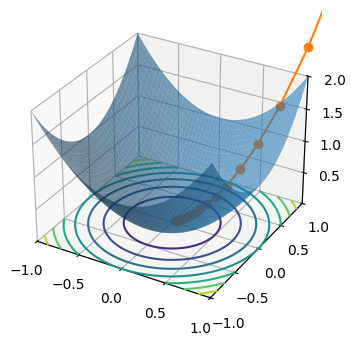

In [28]:
import numpy as np
import matplotlib.pyplot as plt
def fun(x, y, a=1, b=1):              #Функция
    return a * (x ** 2) + b * (y ** 2)

def grad(x, y, a=1, b=1):                    #Находим градиент
    return np.array([2 * a * x, 2 * b * y])

def grad_descend(grad, step_size=0.2, num_steps=30):   #Градиентный спуск
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    print(lst)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    print(np.array(lst))
    return np.array(lst)

def plot_grad(fun, trace):                    #Функция, строящая график
    fig = plt.figure(figsize=(5, 4))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())
   
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

In [45]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
def fun(x, y, z, a=1, b=1, c=1):              #Функция
    return 2*(x**2) - 4*x*z + 4*(y**2) - 8*y*z + 9*(z**2) + 4*x + 8*y - 20*z



def grad(x, y, z, a=1, b=1, c=1):                    #Находим градиент
    return np.array([4*x-4*z+4, 8*y-8*z+8, -4*x-8*y+18*z-20])

def grad_descend(grad, step_size=0.2, num_steps=30):   #Градиентный спуск
    lst = []
    x = np.array([0, 0, 0])
    lst.append(x)
  
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1],lst[-1][2])
        lst.append(x)
  
    return np.array(lst)

print(grad_descend(grad, step_size=0.25, num_steps=1))
   


[[ 0.  0.  0.]
 [-1. -2.  5.]]


# Алгоритм обучения линейной регрессии

In [39]:
9.5/1.5

6.333333333333333

# Метод Лагранжа

In [48]:
from sympy import *
a,b,c,w=symbols(' a b  c w' )
g = 2*(a*b + b*c +a*c)
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a*b*c - 1
print('Функция ограничений: ', q,'= 0')
f = 2*(a*b + b*c +a*c) + w*(a*b*c - 1)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fc = f.diff(c)
print('df/dc =',fc,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fc,fw],a,b,c,w)
print(sols)
#print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]),',',float(sols[c]))

#Целевая функция для аргументов a и b :
#f =  3*a**2 + a + 5*b**2 + 4*b
#Функция ограничений:  a + b - 200 = 0
#Функция Лагранжа :
#3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
#df/da = 6*a + w + 1 = 0
#df/db = 10*b + w + 4 = 0
#df/dw = a + b - 200 = 0
#Стационарная точка M(x,y):
#125.1875 , 74.8125

Целевая функция для аргументов a и b :
 f =  2*a*b + 2*a*c + 2*b*c
Функция ограничений:  a*b*c - 1 = 0
Функция Лагранжа :
  2*a*b + 2*a*c + 2*b*c + w*(a*b*c - 1)
df/da = b*c*w + 2*b + 2*c = 0
df/db = a*c*w + 2*a + 2*c = 0
df/dc = a*b*w + 2*a + 2*b = 0
df/dw = a*b*c - 1 = 0
[(1, 1, 1, -4), (-1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 2 - 2*sqrt(3)*I), (-1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 2 + 2*sqrt(3)*I)]


In [49]:
# Импортируем все необходимые функции из библиотеки SymPy
from sympy import init_printing, solve, symbols

# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]


In [59]:
import numpy as np
a = np.array([20, 30, 40, 50])
a + 1

a ** 3

#a < 35  # И фильтрацию можно проводить


array([  8000,  27000,  64000, 125000])

In [16]:
(19+ 242+14+152+142+1000)/6



261.5